In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import statistics

In [2]:
%%time
df=pd.read_csv("train.csv",dtype={'MachineIdentifier': 'category',
 'ProductName': 'category',
 'EngineVersion': 'category',
 'AppVersion': 'category',
 'AvSigVersion': 'category',
 'Platform': 'category',
 'Processor': 'category',
 'OsVer': 'category',
 'OsPlatformSubRelease': 'category',
 'OsBuildLab': 'category',
 'SkuEdition': 'category',
 'PuaMode': 'category',
 'SmartScreen': 'category',
 'Census_MDC2FormFactor': 'category',
 'Census_DeviceFamily': 'category',
 'Census_ProcessorClass': 'category',
 'Census_PrimaryDiskTypeName': 'category',
 'Census_ChassisTypeName': 'category',
 'Census_PowerPlatformRoleName': 'category',
 'Census_InternalBatteryType': 'category',
 'Census_OSVersion': 'category',
 'Census_OSArchitecture': 'category',
 'Census_OSBranch': 'category',
 'Census_OSEdition': 'category',
 'Census_OSSkuName': 'category',
 'Census_OSInstallTypeName': 'category',
 'Census_OSWUAutoUpdateOptionsName': 'category',
 'Census_GenuineStateName': 'category',
 'Census_ActivationChannel': 'category',
 'Census_FlightRing': 'category',
 'RtpStateBitfield': 'float16',
 'DefaultBrowsersIdentifier': 'float16',
 'AVProductsInstalled': 'float16',
 'AVProductsEnabled': 'float16',
 'OrganizationIdentifier': 'float16',
 'GeoNameIdentifier': 'float16',
 'IsProtected': 'float16',
 'SMode': 'float16',
 'IeVerIdentifier': 'float16',
 'Firewall': 'float16',
 'Census_OEMNameIdentifier': 'float16',
 'Census_ProcessorCoreCount': 'float16',
 'Census_ProcessorManufacturerIdentifier': 'float16',
 'Census_ProcessorModelIdentifier': 'float16',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float16',
 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float16',
 'Census_InternalPrimaryDisplayResolutionVertical': 'float16',
 'Census_OSInstallLanguageIdentifier': 'float16',
 'Census_IsFlightingInternal': 'float16',
 'Census_IsFlightsDisabled': 'float16',
 'Census_ThresholdOptIn': 'float16',
 'Census_FirmwareManufacturerIdentifier': 'float16',
 'Census_IsWIMBootEnabled': 'float16',
 'Census_IsVirtualDevice': 'float16',
 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float16',
 'Wdft_IsGamer': 'float16',
 'Wdft_RegionIdentifier': 'float16',
 'AVProductStatesIdentifier': 'float32',
 'CityIdentifier': 'float32',
 'UacLuaenable': 'float32',
 'Census_OEMModelIdentifier': 'float32',
 'Census_PrimaryDiskTotalCapacity': 'float32',
 'Census_SystemVolumeTotalCapacity': 'float32',
 'Census_TotalPhysicalRAM': 'float32',
 'Census_InternalBatteryNumberOfCharges': 'float32',
 'Census_FirmwareVersionIdentifier': 'float32',
 'IsBeta': 'int32',
 'IsSxsPassiveMode': 'int32',
 'HasTpm': 'int32',
 'CountryIdentifier': 'int32',
 'LocaleEnglishNameIdentifier': 'int32',
 'OsBuild': 'int32',
 'OsSuite': 'int32',
 'AutoSampleOptIn': 'int32',
 'Census_HasOpticalDiskDrive': 'int32',
 'Census_OSBuildNumber': 'int32',
 'Census_OSBuildRevision': 'int32',
 'Census_OSUILocaleIdentifier': 'int32',
 'Census_IsPortableOperatingSystem': 'int32',
 'Census_IsSecureBootEnabled': 'int32',
 'Census_IsTouchEnabled': 'int32',
 'Census_IsPenCapable': 'int32',
 'HasDetections': 'int32'})

Wall time: 2min 19s


In [3]:
df.memory_usage().sum()

2138157894

In [4]:
df.shape

(8921483, 83)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    category
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               int32
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int32
DefaultBrowsersIdentifier                            float16
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int32
CountryIdentifier                                    int32
CityIdentifier                      

In [6]:
df['Census_IsAlwaysOnAlwaysConnectedCapable'].unique()

array([ 0.,  1., nan])

In [7]:
#df['IsBeta']=df['IsBeta'].astype('int8')
#df['HasDetections']=df['HasDetections'].astype('int8')
#df['HasTpm']=df['HasTpm'].astype('int8')
#df['IsProtected']=df['IsProtected'].astype('int8')
#df['AutoSampleOptIn']=df['AutoSampleOptIn'].astype('int8')
#df['SMode']=df['SMode'].astype('int8')
#df['Firewall']=df['Firewall'].astype('int8')
#df['Census_HasOpticalDiskDrive']=df['Census_HasOpticalDiskDrive'].astype('int8')
#df['Census_ThresholdOptIn']=df['Census_ThresholdOptIn'].astype('int8')
#df['Census_IsFlightingInternal']=df['Census_IsFlightingInternal'].astype('int8')
#df['Census_IsFlightsDisabled']=df['Census_IsFlightsDisabled'].astype('int8')
#df['Census_IsSecureBootEnabled']=df['Census_IsSecureBootEnabled'].astype('int8')
#df['Census_IsWIMBootEnabled']=df['Census_IsWIMBootEnabled'].astype('int8')
#df['Census_IsVirtualDevice']=df['Census_IsVirtualDevice'].astype('int8')
#df['Census_IsTouchEnabled']=df['Census_IsTouchEnabled'].astype('int8')
#df['Census_IsPenCapable']=df['Census_IsPenCapable'].astype('int8')
#df['Census_IsAlwaysOnAlwaysConnectedCapable']=df['Census_IsAlwaysOnAlwaysConnectedCapable'].astype('int8')
#df['Wdft_IsGamer']=df['Wdft_IsGamer'].astype('int8')

In [8]:
print("Number of Columns : ",len(df.columns))
print("Number of Rows : ",len(df))

Number of Columns :  83
Number of Rows :  8921483


In [9]:
l=df.columns[df.isnull().any()].tolist()

In [10]:
drop_list=[]
delete_rows_list=[]
treat_list=[]
for column in l:
    #print("Number of Null Values for : "+str(column)+" "+str(df[column].isnull().sum())+" "+str(df[column].isnull().sum()*100/len(df))+"%")
    if df[column].isnull().sum()*100/len(df)>=60:#dropping columns with more than 60% of missing values
        drop_list.append(column)
    elif df[column].isnull().sum()*100/len(df)<=30:#Deleting rows having columns upto 30% missing values
        delete_rows_list.append(column)
    else:#Treating null values in the remainder of the columns
        treat_list.append(column)

In [11]:
drop_list

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [12]:
delete_rows_list

['RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CityIdentifier',
 'GeoNameIdentifier',
 'OsBuildLab',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSInstallLanguageIdentifier',
 'Census_IsFlightsDisabled',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedC

In [13]:
treat_list

['OrganizationIdentifier', 'SmartScreen']

In [14]:
df.drop(columns=drop_list,axis=1,inplace=True)

In [25]:
temp_list=df.columns[df.isnull().any()].tolist()

In [26]:
%%time
statistics.mode(df['SmartScreen'])

Wall time: 666 ms


'RequireAdmin'

In [27]:
%%time
#statistics.mode(df['OrganizationIdentifier'])

Wall time: 0 ns


In [28]:
#values = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
#df.fillna(value=values)

In [29]:
categorical_cols=df.select_dtypes(include='category').columns.tolist()

In [30]:
%%time
for col in temp_list:
    if col in categorical_cols:
        df[col].fillna(statistics.mode(df[col]),inplace=True)
    else:
        df[col].fillna(np.nanmedian(df[col]),inplace=True)
    

Wall time: 6.85 s


In [31]:
df.shape

(8921483, 76)

In [32]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [33]:
df[df.HasDetections==1][df.columns[1]].value_counts()

win8defender     4412891
mse                45961
mseprerelease         26
scep                  10
fep                    3
windowsintune          1
Name: ProductName, dtype: int64

In [34]:
df['ProductName_dummy']=[1 if x=='win8defender' else 0 for x in df['ProductName']]

In [35]:
df.drop(columns=['OsBuildLab'],inplace=True)

In [36]:
df.shape

(8921483, 76)

In [37]:
df['AVProductsInstalled_dummy']=[1 if x>0 else 0 for x in df['AVProductsInstalled']]

In [38]:
df['AVProductsEnabled_dummy']=[1 if x>0 else 0 for x in df['AVProductsEnabled']]

In [39]:
df[['AVProductsInstalled','AVProductsEnabled']]

,AVProductsInstalled,AVProductsEnabled
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,2.0,1.0
7,1.0,1.0
8,1.0,1.0
9,2.0,1.0


In [40]:
df['AVProducts_status']=df['AVProductsInstalled_dummy']-df['AVProductsEnabled_dummy']

In [41]:
df.shape

(8921483, 79)

In [42]:
df['HasTpm'].value_counts()

1    8814167
0     107316
Name: HasTpm, dtype: int64

In [43]:
df[df.HasDetections==1]['HasTpm'].value_counts()

1    4407926
0      50966
Name: HasTpm, dtype: int64

In [44]:
df.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'SkuEdition',
       'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier',
       'SmartScreen', 'Firewall', 'UacLuaenable', 'Census_MDC2FormFactor',
       'Census_DeviceFamily', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysical

In [45]:
df[['OsVer','OsBuild','OsSuite','OsPlatformSubRelease','SkuEdition','SMode','Census_OSVersion','Census_OSArchitecture','Census_OSBranch','Census_OSBuildNumber','Census_OSBuildRevision','Census_OSEdition','Census_OSInstallTypeName']]

,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,SMode,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName
0,10.0.0.0,17134,256,rs4,Pro,0.0,10.0.17134.165,amd64,rs4_release,17134,165,Professional,UUPUpgrade
1,10.0.0.0,17134,256,rs4,Pro,0.0,10.0.17134.1,amd64,rs4_release,17134,1,Professional,IBSClean
2,10.0.0.0,17134,768,rs4,Home,0.0,10.0.17134.165,amd64,rs4_release,17134,165,Core,UUPUpgrade
3,10.0.0.0,17134,256,rs4,Pro,0.0,10.0.17134.228,amd64,rs4_release,17134,228,Professional,UUPUpgrade
4,10.0.0.0,17134,768,rs4,Home,0.0,10.0.17134.191,amd64,rs4_release,17134,191,Core,Update
5,10.0.0.0,17134,256,rs4,Pro,0.0,10.0.17134.165,amd64,rs4_release,17134,165,Professional,UUPUpgrade
6,10.0.0.0,17134,768,rs4,Home,0.0,10.0.17134.165,amd64,rs4_release,17134,165,Core,IBSClean
7,10.0.0.0,14393,768,rs1,Home,0.0,10.0.14393.0,amd64,rs1_release,14393,0,Core,Upgrade
8,10.0.0.0,17134,256,rs4,Pro,0.0,10.0.17134.254,amd64,rs4_release,17134,254,Professional,Update
9,10.0.0.0,16299,768,rs3,Home,0.0,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,CoreSingleLanguage,Upgrade


In [46]:
df[['Census_OSBuildNumber','OsBuild']].head()

,Census_OSBuildNumber,OsBuild
0,17134,17134
1,17134,17134
2,17134,17134
3,17134,17134
4,17134,17134


In [47]:
df['OsBuild_status']=0


In [48]:
df.Census_OSBuildNumber.value_counts()

17134    4008881
16299    2443249
15063     797049
14393     785450
10586     593527
10240     271604
17692       3096
17738       3062
17744       2372
17758       1703
17746       1220
17754       1086
17763       1063
17751       1006
17735        980
17741        814
17755        684
17760        590
17686        556
17733        524
17672        351
17677        304
17133        253
17682        248
18234        233
17666        203
18237        173
18242        142
17713        126
17661        122
          ...   
17757          1
14230          1
16291          1
17035          1
14425          1
16179          1
16170          1
7600           1
17750          1
14474          1
17759          1
14206          1
14942          1
14383          1
17740          1
17749          1
14959          1
14955          1
14361          1
14421          1
14314          1
14306          1
17694          1
18064          1
17689          1
15046          1
14298          1
14300         

In [49]:
df['OsBuild_status']=np.where((df.Census_OSBuildNumber==df.OsBuild),1,0)

In [50]:
df['OsBuild_status'].value_counts()

1    8475986
0     445497
Name: OsBuild_status, dtype: int64

In [51]:
df.Census_OEMNameIdentifier.nunique()

2564

In [52]:
df.Census_OEMModelIdentifier.nunique()

175365

In [53]:
df.Census_DeviceFamily.value_counts()

Windows.Desktop    8907053
Windows.Server       14410
Windows                 20
Name: Census_DeviceFamily, dtype: int64

In [54]:
df[df.HasDetections==1]['Census_DeviceFamily'].value_counts()

Windows.Desktop    4453851
Windows.Server        5034
Windows                  7
Name: Census_DeviceFamily, dtype: int64

In [55]:
df['Census_DeviceFamily_dummy']=[1 if x=='Windows.Desktop' else 0 for x in df['Census_DeviceFamily']]

In [56]:
df.Census_ProcessorManufacturerIdentifier.unique()

array([ 5.,  1., 10.,  3.,  4.,  7.,  9.])

In [57]:
df.Census_ProcessorCoreCount.unique()

array([  4.,   2.,   8.,  12.,   1.,   6.,  16.,   3.,  20.,  32.,  24.,
        40.,   5.,  10.,  80.,  56.,  48.,  36.,  72.,  64.,  28.,  88.,
         7.,  14.,  96., 112.,  44.,  15.,  50.,  11.,  30., 128.,   9.,
        46.,  22.,  54., 144.,  18., 120.,  52.,  26., 192.,  25., 104.,
        13.])

In [58]:
df.groupby(['Census_ProcessorCoreCount','Census_ProcessorManufacturerIdentifier']).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False)

,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,MachineIdentifier
11,4.0,5.0,5013161
6,2.0,5.0,1857430
21,8.0,5.0,825256
9,4.0,1.0,458331
3,2.0,1.0,454519
31,12.0,5.0,76112
2,1.0,5.0,50862
16,6.0,5.0,44097
19,8.0,1.0,39405
15,6.0,1.0,25813


In [59]:
df[df.HasDetections==1].groupby(['Census_ProcessorCoreCount','Census_ProcessorManufacturerIdentifier']).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False).groupby('Census_ProcessorManufacturerIdentifier').sum()

,Census_ProcessorCoreCount,MachineIdentifier
Census_ProcessorManufacturerIdentifier,,
1.0,296.0,509719
3.0,3.0,51
5.0,1392.0,3949117
10.0,8.0,5


In [60]:
df.Census_ProcessorManufacturerIdentifier.unique()

array([ 5.,  1., 10.,  3.,  4.,  7.,  9.])

In [61]:
df[df.HasDetections==0].groupby(['Census_ProcessorCoreCount','Census_ProcessorManufacturerIdentifier']).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False).groupby('Census_ProcessorManufacturerIdentifier').sum()

,Census_ProcessorCoreCount,MachineIdentifier
Census_ProcessorManufacturerIdentifier,,
1.0,427.0,530573
3.0,15.0,167
4.0,2.0,1
5.0,1461.0,3931514
7.0,8.0,1
9.0,4.0,1
10.0,8.0,334


In [62]:
df['Census_ProcessorManufacturerIdentifier_dummy']=[1 if x in [1.0,3.0,5.0] else 0 for x in df['Census_ProcessorManufacturerIdentifier']]

In [63]:
df.Census_ProcessorModelIdentifier.nunique()

2583

In [64]:
df.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'SkuEdition',
       'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier',
       'SmartScreen', 'Firewall', 'UacLuaenable', 'Census_MDC2FormFactor',
       'Census_DeviceFamily', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysical

In [65]:
df[['Census_InternalPrimaryDiagonalDisplaySizeInInches','Census_InternalPrimaryDisplayResolutionHorizontal','Census_InternalPrimaryDisplayResolutionVertical']]

,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical
0,18.906250,1440.0,900.0
1,13.898438,1366.0,768.0
2,21.500000,1920.0,1080.0
3,18.500000,1366.0,768.0
4,14.000000,1366.0,768.0
5,21.500000,1920.0,1080.0
6,17.203125,1600.0,900.0
7,15.500000,1366.0,768.0
8,15.601562,1920.0,1080.0
9,15.500000,1366.0,768.0


In [66]:
df['IeVerIdentifier'].value_counts()

137.0    3885842
117.0    1826825
108.0     474390
111.0     467828
98.0      354411
135.0     217458
53.0      204952
74.0      202542
94.0      173593
105.0     173448
333.0     156391
107.0     128633
103.0     114952
96.0       83559
76.0       57820
71.0       41387
41.0       33628
114.0      33362
323.0      32501
335.0      24730
334.0      23639
87.0       17147
81.0       14003
78.0       11903
82.0       10642
73.0       10523
337.0      10081
42.0        8896
302.0       7886
85.0        6894
          ...   
381.0          1
380.0          1
343.0          1
345.0          1
353.0          1
216.0          1
375.0          1
373.0          1
177.0          1
358.0          1
359.0          1
370.0          1
67.0           1
273.0          1
112.0          1
227.0          1
115.0          1
223.0          1
121.0          1
122.0          1
123.0          1
126.0          1
402.0          1
134.0          1
404.0          1
221.0          1
141.0          1
219.0         

In [68]:
df['Census_GenuineStateName_dummy']=[1 if x=='IS_GENUINE' else 0 for x in df['Census_GenuineStateName']]

In [69]:
df.RtpStateBitfield.value_counts()

7.0     8683805
0.0      190701
8.0       21974
5.0       20328
3.0        3029
1.0        1625
35.0         21
Name: RtpStateBitfield, dtype: int64

In [70]:
df[df.HasDetections==1]['RtpStateBitfield'].value_counts()

7.0     4366181
0.0       71641
8.0       16426
5.0        3069
3.0         907
1.0         649
35.0         19
Name: RtpStateBitfield, dtype: int64

In [71]:
df.Census_IsAlwaysOnAlwaysConnectedCapable.value_counts()

0.0    8413315
1.0     508168
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: int64

In [72]:
df.HasTpm.value_counts()

1    8814167
0     107316
Name: HasTpm, dtype: int64

In [73]:
df[df.HasTpm==0]['HasDetections'].value_counts()

0    56350
1    50966
Name: HasDetections, dtype: int64

In [74]:
df[(df.Firewall==0)&(df.HasTpm==0)]['HasDetections'].value_counts()

0    547
1    436
Name: HasDetections, dtype: int64

In [75]:
df['HasTpm_Firewall_dummy']=df.HasTpm&df.Firewall

In [76]:
df['OsVer'].unique()

[10.0.0.0, 6.1.1.0, 6.3.0.0, 10.0.1.44, 6.1.0.0, ..., 6.3.0.117, 10.0.0.2, 6.3.0.112, 10.0.0.80, 6.3.7.0]
Length: 58
Categories (58, object): [10.0.0.0, 6.1.1.0, 6.3.0.0, 10.0.1.44, ..., 10.0.0.2, 6.3.0.112, 10.0.0.80, 6.3.7.0]

In [77]:
df.Processor.value_counts()

x64      8105435
x86       815702
arm64        346
Name: Processor, dtype: int64

In [78]:
df.Census_OSArchitecture.value_counts()

amd64    8105885
x86       815252
arm64        346
Name: Census_OSArchitecture, dtype: int64

In [79]:
df[['Census_OSVersion', 'Census_OSArchitecture','Processor','Census_OSBranch','Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSEdition','Census_OSSkuName', 'Census_OSInstallTypeName','Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier']]

,Census_OSVersion,Census_OSArchitecture,Processor,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier
0,10.0.17134.165,amd64,x64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119
1,10.0.17134.1,amd64,x64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31
2,10.0.17134.165,amd64,x64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30
3,10.0.17134.228,amd64,x64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64
4,10.0.17134.191,amd64,x64,rs4_release,17134,191,Core,CORE,Update,8.0,31
5,10.0.17134.165,amd64,x64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,18.0,72
6,10.0.17134.165,amd64,x64,rs4_release,17134,165,Core,CORE,IBSClean,14.0,49
7,10.0.14393.0,amd64,x64,rs1_release,14393,0,Core,CORE,Upgrade,18.0,72
8,10.0.17134.254,amd64,x64,rs4_release,17134,254,Professional,PROFESSIONAL,Update,27.0,120
9,10.0.16299.431,amd64,x64,rs3_release_svc_escrow,16299,431,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,8.0,31


In [80]:
df.drop(columns=['Census_OSVersion','Census_OSArchitecture'],inplace=True)

In [81]:
df.shape

(8921483, 82)

In [82]:
df.select_dtypes(include='category').columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'Platform', 'Processor', 'OsVer',
       'OsPlatformSubRelease', 'SkuEdition', 'SmartScreen',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
       'Census_PowerPlatformRoleName', 'Census_OSBranch', 'Census_OSEdition',
       'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_FlightRing'],
      dtype='object')

In [83]:
df.Census_OSInstallTypeName.value_counts()

UUPUpgrade        2608037
IBSClean          1650733
Update            1593308
Upgrade           1251559
Other              840121
Reset              649201
Refresh            205842
Clean               69073
CleanPCRefresh      53609
Name: Census_OSInstallTypeName, dtype: int64

In [84]:
df.Census_ActivationChannel.value_counts()

Retail            4727589
OEM:DM            3413350
Volume:GVLK        450954
OEM:NONSLP         317980
Volume:MAK           8028
Retail:TB:Eval       3582
Name: Census_ActivationChannel, dtype: int64

In [85]:
df.Census_FlightRing.value_counts()

Retail      8355679
NOT_SET      287803
Unknown      243438
WIS           10648
WIF           10322
RP             9860
Disabled       3722
OSG               7
Canary            3
Invalid           1
Name: Census_FlightRing, dtype: int64

In [86]:
#df.OrganizationIdentifier.isnull().sum()

In [87]:
#sns.distplot(df.OrganizationIdentifier.fillna(np.nanmedian(df['OrganizationIdentifier'])))

In [88]:
#df.SmartScreen.isnull().sum()

In [89]:
#statistics.mode(df.SmartScreen)

In [90]:
#df.SmartScreen.fillna(statistics.mode(df.SmartScreen),inplace=True)

In [91]:
#df.OrganizationIdentifier.fillna(np.nanmedian(df.OrganizationIdentifier),inplace=True)

In [92]:
df.shape

(8921483, 82)

In [93]:
#df['OsBuild_new']=[1 if x in [17134,16299,15063,14393,10586,10240,9600,7601] else 0 for x in df['OsBuild']]

In [95]:
df.columns[1]

'ProductName'

In [96]:
df[df.columns[1]].nunique()

6

In [97]:
df[df.columns[1]].value_counts()

win8defender     8826520
mse                94873
mseprerelease         53
scep                  22
windowsintune          8
fep                    7
Name: ProductName, dtype: int64

In [98]:
df.columns[2]

'EngineVersion'

In [99]:
df[df.columns[3]].head()

0    4.18.1807.18075
1       4.13.17134.1
2    4.18.1807.18075
3    4.18.1807.18075
4    4.18.1807.18075
Name: AppVersion, dtype: category
Categories (110, object): [4.10.14393.0, 4.10.14393.1066, 4.10.14393.1198, 4.10.14393.1593, ..., 4.13.17618.1000, 4.12.16299.0, 4.8.10240.17943, 4.13.17604.1000]

In [100]:
df[df.columns[2]].nunique()

70

In [101]:
df[df.columns[2]].value_counts()

1.1.15200.1    3845067
1.1.15100.1    3675915
1.1.15000.2     265218
1.1.14901.4     212408
1.1.14600.4     160585
1.1.14800.3     136476
1.1.15300.6     120295
1.1.14104.0      93926
1.1.13504.0      70645
1.1.15300.5      68716
1.1.14700.5      46777
1.1.14500.5      45855
1.1.14405.2      36341
1.1.14306.0      24079
1.1.14202.0      15449
1.1.14003.0      14291
1.1.13903.0       9651
1.1.13804.0       9414
1.1.13303.0       9315
1.1.13407.0       8800
1.1.13601.0       7174
1.1.12902.0       5395
1.1.14305.0       5095
1.1.13701.0       4993
1.1.13704.0       4893
1.1.13202.0       4696
1.1.13103.0       4440
1.1.13000.0       4095
1.1.15000.1       2472
1.1.12805.0       2427
                ...   
1.1.13902.0         71
1.1.12101.0         70
1.1.14102.0         63
1.1.13802.0         42
1.1.14001.0         42
1.1.12400.0         36
1.1.13803.0         32
1.1.13406.0         24
1.1.12603.0         20
1.1.12706.0         18
1.1.12804.0         18
1.1.12505.0         14
1.1.11903.0

In [102]:
#df['EngineVersion']=[1 if x in ['1.1.15200.1','1.1.15100.1','1.1.15000.2','1.1.14901.4','1.1.14800.3'] else 0 for x in df['EngineVersion']]

In [103]:
df.columns[3]

df[df.columns[3]].nunique()

df[df.columns[3]].value_counts()

4.18.1807.18075     5139224
4.18.1806.18062      850929
4.12.16299.15        359871
4.10.209.0           272455
4.13.17134.1         257270
4.16.17656.18052     235032
4.13.17134.228       226501
4.8.10240.17443      205480
4.9.10586.1106       203525
4.14.17639.18041     194699
4.12.17007.18022     118027
4.9.10586.0          111797
4.11.15063.447        91694
4.10.14393.0          77244
4.11.15063.0          69250
4.12.17007.18011      61806
4.14.17613.18039      53024
4.8.10240.16384       45697
4.11.15063.1155       44238
4.10.14393.1794       44109
4.9.10586.494         24725
4.10.14393.1198       23568
4.9.10586.672         22428
4.13.17134.191        20438
4.12.17007.17123      13828
4.18.1809.2           13739
4.10.14393.1613       13525
4.9.10586.589         13268
4.13.17134.112        12767
4.9.10586.1045        10559
                     ...   
4.9.10586.456            46
4.15.17661.1001          30
4.18.1806.20033          30
4.16.17656.18051         28
4.8.10240.17533     

In [104]:
print(df.columns[4])

print(df[df.columns[4]].nunique())

AvSigVersion
8531


In [105]:
df[df.columns[4]].value_counts()

1.273.1420.0         102317
1.263.48.0            98024
1.275.1140.0          97232
1.275.727.0           92448
1.273.371.0           86967
1.273.1826.0          86013
1.275.1244.0          78902
1.251.42.0            76837
1.275.1209.0          66393
1.273.810.0           65895
1.273.1749.0          65381
1.237.0.0             64160
1.273.1005.0          48540
1.273.1379.0          48509
1.273.894.0           45515
1.273.781.0           44347
1.273.1527.0          40884
1.273.461.0           40454
1.273.337.0           39209
1.275.948.0           38372
1.273.717.0           37859
1.273.1167.0          36665
1.275.1293.0          35582
1.273.950.0           35255
1.273.1034.0          34080
1.275.1025.0          33580
1.275.1487.0          33281
1.273.1112.0          32298
1.275.511.0           31559
1.273.1311.0          31129
                      ...  
1.223.370.0               1
1.187.1121.0              1
1.221.457.0               1
1.223.791.0               1
1.217.477.0         

In [106]:
#drop IsBeta

In [107]:
df.columns[6]

'RtpStateBitfield'

In [108]:
df[df.columns[6]].value_counts()

7.0     8683805
0.0      190701
8.0       21974
5.0       20328
3.0        3029
1.0        1625
35.0         21
Name: RtpStateBitfield, dtype: int64

In [109]:
df['RtpStateBitfield_dummy']=[1 if x in [7.0,0.0,5.0,8.0] else 0 for x in df['RtpStateBitfield']]

In [110]:
df[df.columns[7]].value_counts()

0    8766840
1     154643
Name: IsSxsPassiveMode, dtype: int64

In [111]:
df.columns[8]

'AVProductStatesIdentifier'

In [112]:
df[df.columns[8]].value_counts()

53447.0    5860786
7945.0      475897
47238.0     327656
62773.0     266764
46413.0     112878
23657.0     100455
49480.0      99899
41571.0      97659
29199.0      73550
51954.0      67616
22728.0      45221
46669.0      44855
43856.0      44354
43927.0      43790
3371.0       40700
6630.0       35198
40431.0      29087
68585.0      28706
61343.0      26848
63682.0      23426
56914.0      22326
24213.0      22027
12202.0      20690
11280.0      18642
61100.0      17959
48510.0      17722
9471.0       15359
44141.0      15347
40535.0      14579
59792.0      13697
            ...   
39413.0          1
39382.0          1
39415.0          1
39421.0          1
39422.0          1
39427.0          1
39433.0          1
39442.0          1
39451.0          1
39384.0          1
39377.0          1
39288.0          1
39330.0          1
39293.0          1
39300.0          1
39303.0          1
39305.0          1
39309.0          1
39311.0          1
39316.0          1
39340.0          1
39370.0     

In [113]:
df.columns[9]

'AVProductsInstalled'

In [114]:
df[df.columns[9]].value_counts()

1.0    6245114
2.0    2459008
3.0     208103
4.0       8757
5.0        471
6.0         28
7.0          1
0.0          1
Name: AVProductsInstalled, dtype: int64

In [115]:
df.columns[10]

'AVProductsEnabled'

In [116]:
df[df.columns[10]].value_counts()

1.0    8690322
2.0     198652
0.0      25958
3.0       6075
4.0        453
5.0         23
Name: AVProductsEnabled, dtype: int64

In [118]:
#df['AVProductsEnabled']=[1 if x in [1.0,2.0,3.0,4.0,5.0] else 0 for x in df['AVProductsEnabled']]

In [119]:
df.AVProductsEnabled.value_counts()

1    8895525
0      25958
Name: AVProductsEnabled, dtype: int64

In [120]:
df.columns[11]

'HasTpm'

In [121]:
df[df.columns[11]].value_counts()

1    8814167
0     107316
Name: HasTpm, dtype: int64

In [122]:
df.columns[12]

'CountryIdentifier'

In [123]:
df[df.columns[12]].value_counts()

43     397172
29     347991
141    333411
93     283625
171    280572
60     231981
201    220622
207    211645
66     208579
89     200516
97     195161
214    191269
158    184766
44     182707
9      172594
107    168997
41     160533
68     160158
51     159940
203    158058
35     140027
160    132251
142    131907
195    131685
149    129578
205    117245
155    110779
164    108549
173     94129
159     91592
        ...  
74        775
192       740
182       696
134       689
196       681
198       656
123       654
75        643
114       590
126       566
64        565
28        553
215       543
105       507
5         459
174       449
14        446
79        444
187       438
216       379
200       355
10        327
128       303
212       299
186       227
165       213
37        212
193       207
161       206
217       120
Name: CountryIdentifier, Length: 222, dtype: int64

In [124]:
df.columns[13]

'CityIdentifier'

In [125]:
df['OrganizationIdentifier_dummy']=[1 if x in [27.0,18.0,48.0] else 0 for x in df['OrganizationIdentifier']]

In [126]:
df.columns[15]

'GeoNameIdentifier'

In [127]:
df[df.columns[15]].nunique()

292

In [128]:
df.columns[16]

'LocaleEnglishNameIdentifier'

In [129]:
df[df.columns[16]].value_counts()
df['LocaleEnglishNameIdentifier_dummy']=[1 if x in [75,182,74,42,88,171,233,227,251,124,103,64,46,134,217,214,218,170] else 0 for x in df['LocaleEnglishNameIdentifier']]

In [130]:
df.LocaleEnglishNameIdentifier.value_counts()

75     2094585
182     450088
74      411056
42      409616
88      375223
171     343615
233     341279
227     333102
251     211841
124     195088
103     180913
134     172519
64      167151
46      161587
218     154560
217     138589
214     138442
170     136298
56      118878
172     113793
70      105965
68       91267
231      90994
60       90500
115      87899
126      84194
58       81736
16       78863
51       72857
72       72270
        ...   
267          9
38           9
208          8
184          8
204          7
255          7
257          7
249          7
247          6
120          6
47           5
185          5
244          5
166          5
41           5
122          5
190          4
193          4
137          4
146          3
99           3
156          3
264          2
258          2
39           2
279          2
153          2
259          1
203          1
191          1
Name: LocaleEnglishNameIdentifier, Length: 276, dtype: int64

In [131]:
df.columns[17]

'Platform'

In [132]:
df[df.columns[17]].value_counts()

windows10      8618715
windows8        194508
windows7         93889
windows2016      14371
Name: Platform, dtype: int64

In [133]:
df['Platform_dummy']=[1 if x in ['windows10','windows8'] else 0 for x in df['Platform']]

In [134]:
df.columns[18]

'Processor'

In [135]:
df[df.columns[18]].value_counts()

x64      8105435
x86       815702
arm64        346
Name: Processor, dtype: int64

In [136]:
df.columns[19]

'OsVer'

In [137]:
df[df.columns[19]].nunique()

58

In [138]:
df[df.columns[19]].value_counts()
df['OsVer_dummy']=[1 if x in ['10.0.0.0','6.3.0.0'] else 0 for x in df['OsVer']]

In [139]:
df.columns[20]

'OsBuild'

In [140]:
df[df.columns[20]].value_counts()
df['OsBuild_dummy']=[1 if x in [17134,16299,15063,14393,10586,10240] else 0 for x in df['OsBuild']]

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
cols=df.columns

In [143]:
categorical_cols=df.select_dtypes(include='category').columns

In [144]:
categorical_cols

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'Platform', 'Processor', 'OsVer',
       'OsPlatformSubRelease', 'SkuEdition', 'SmartScreen',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
       'Census_PowerPlatformRoleName', 'Census_OSBranch', 'Census_OSEdition',
       'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel', 'Census_FlightRing'],
      dtype='object')

In [145]:
l=[]
for col in cols:
    if col in categorical_cols:
        continue
    else:
        l.append(col)

In [146]:
for col in l:
    print("Number of unique values : "+str(col)+" :",df[col].nunique())

Number of unique values : IsBeta : 2
Number of unique values : RtpStateBitfield : 7
Number of unique values : IsSxsPassiveMode : 2
Number of unique values : AVProductStatesIdentifier : 28970
Number of unique values : AVProductsInstalled : 8
Number of unique values : AVProductsEnabled : 2
Number of unique values : HasTpm : 2
Number of unique values : CountryIdentifier : 222
Number of unique values : CityIdentifier : 107366
Number of unique values : OrganizationIdentifier : 49
Number of unique values : GeoNameIdentifier : 292
Number of unique values : LocaleEnglishNameIdentifier : 276
Number of unique values : OsBuild : 76
Number of unique values : OsSuite : 14
Number of unique values : IsProtected : 2
Number of unique values : AutoSampleOptIn : 2
Number of unique values : SMode : 2
Number of unique values : IeVerIdentifier : 303
Number of unique values : Firewall : 2
Number of unique values : UacLuaenable : 11
Number of unique values : Census_OEMNameIdentifier : 2564
Number of unique va

In [147]:
#df['IsBeta']=df['IsBeta'].astype('category')
#df['HasTpm']=df['HasTpm'].astype('category')
#df['AVProductStatesIdentifier']=df['AVProductStatesIdentifier'].astype('category')
#df['CountryIdentifier']=df['CountryIdentifier'].astype('category')
#df['CityIdentifier']=df['CityIdentifier'].astype('category')
#df['OrganizationIdentifier']=df['OrganizationIdentifier'].astype('category')
#df['GeoNameIdentifier']=df['GeoNameIdentifier'].astype('category')
#df['LocaleEnglishNameIdentifier']=df['LocaleEnglishNameIdentifier'].astype('category')
#df['OsBuild']=df['OsBuild'].astype('category')
#df['OsSuite']=df['OsSuite'].astype('category')
#df['IsProtected']=df['IsProtected'].astype('category')
#df['AutoSampleOptIn']=df['AutoSampleOptIn'].astype('category')
#df['SMode']=df['SMode'].astype('category')
#df['Firewall']=df['Firewall'].astype('category')
#df['UacLuaenable']=df['UacLuaenable'].astype('category')
#df['Census_ProcessorManufacturerIdentifier']=df['Census_ProcessorManufacturerIdentifier'].astype('category')
#df['Census_HasOpticalDiskDrive']=df['Census_HasOpticalDiskDrive'].astype('category')
#df['Census_OSBuildNumber']=df['Census_OSBuildNumber'].astype('category')
#df['Census_OSInstallLanguageIdentifier']=df['Census_OSInstallLanguageIdentifier'].astype('category')
#df['Census_IsFlightsDisabled']=df['Census_IsFlightsDisabled'].astype('category')
#df['Census_IsPenCapable']=df['Census_IsPenCapable'].astype('category')
#df['Census_IsVirtualDevice']=df['Census_IsVirtualDevice'].astype('category')
#df['Census_IsPortableOperatingSystem']=df['Census_IsPortableOperatingSystem'].astype('category')
#df['Census_IsTouchEnabled']=df['Census_IsTouchEnabled'].astype('category')
#df['Wdft_IsGamer']=df['Wdft_IsGamer'].astype('category')
#df['Wdft_RegionIdentifier']=df['Wdft_RegionIdentifier'].astype('category')
#df['HasDetections']=df['HasDetections'].astype('category')


In [148]:
corr1=df[df.select_dtypes(include =['float16','float32','int32','int64']).columns].corr()

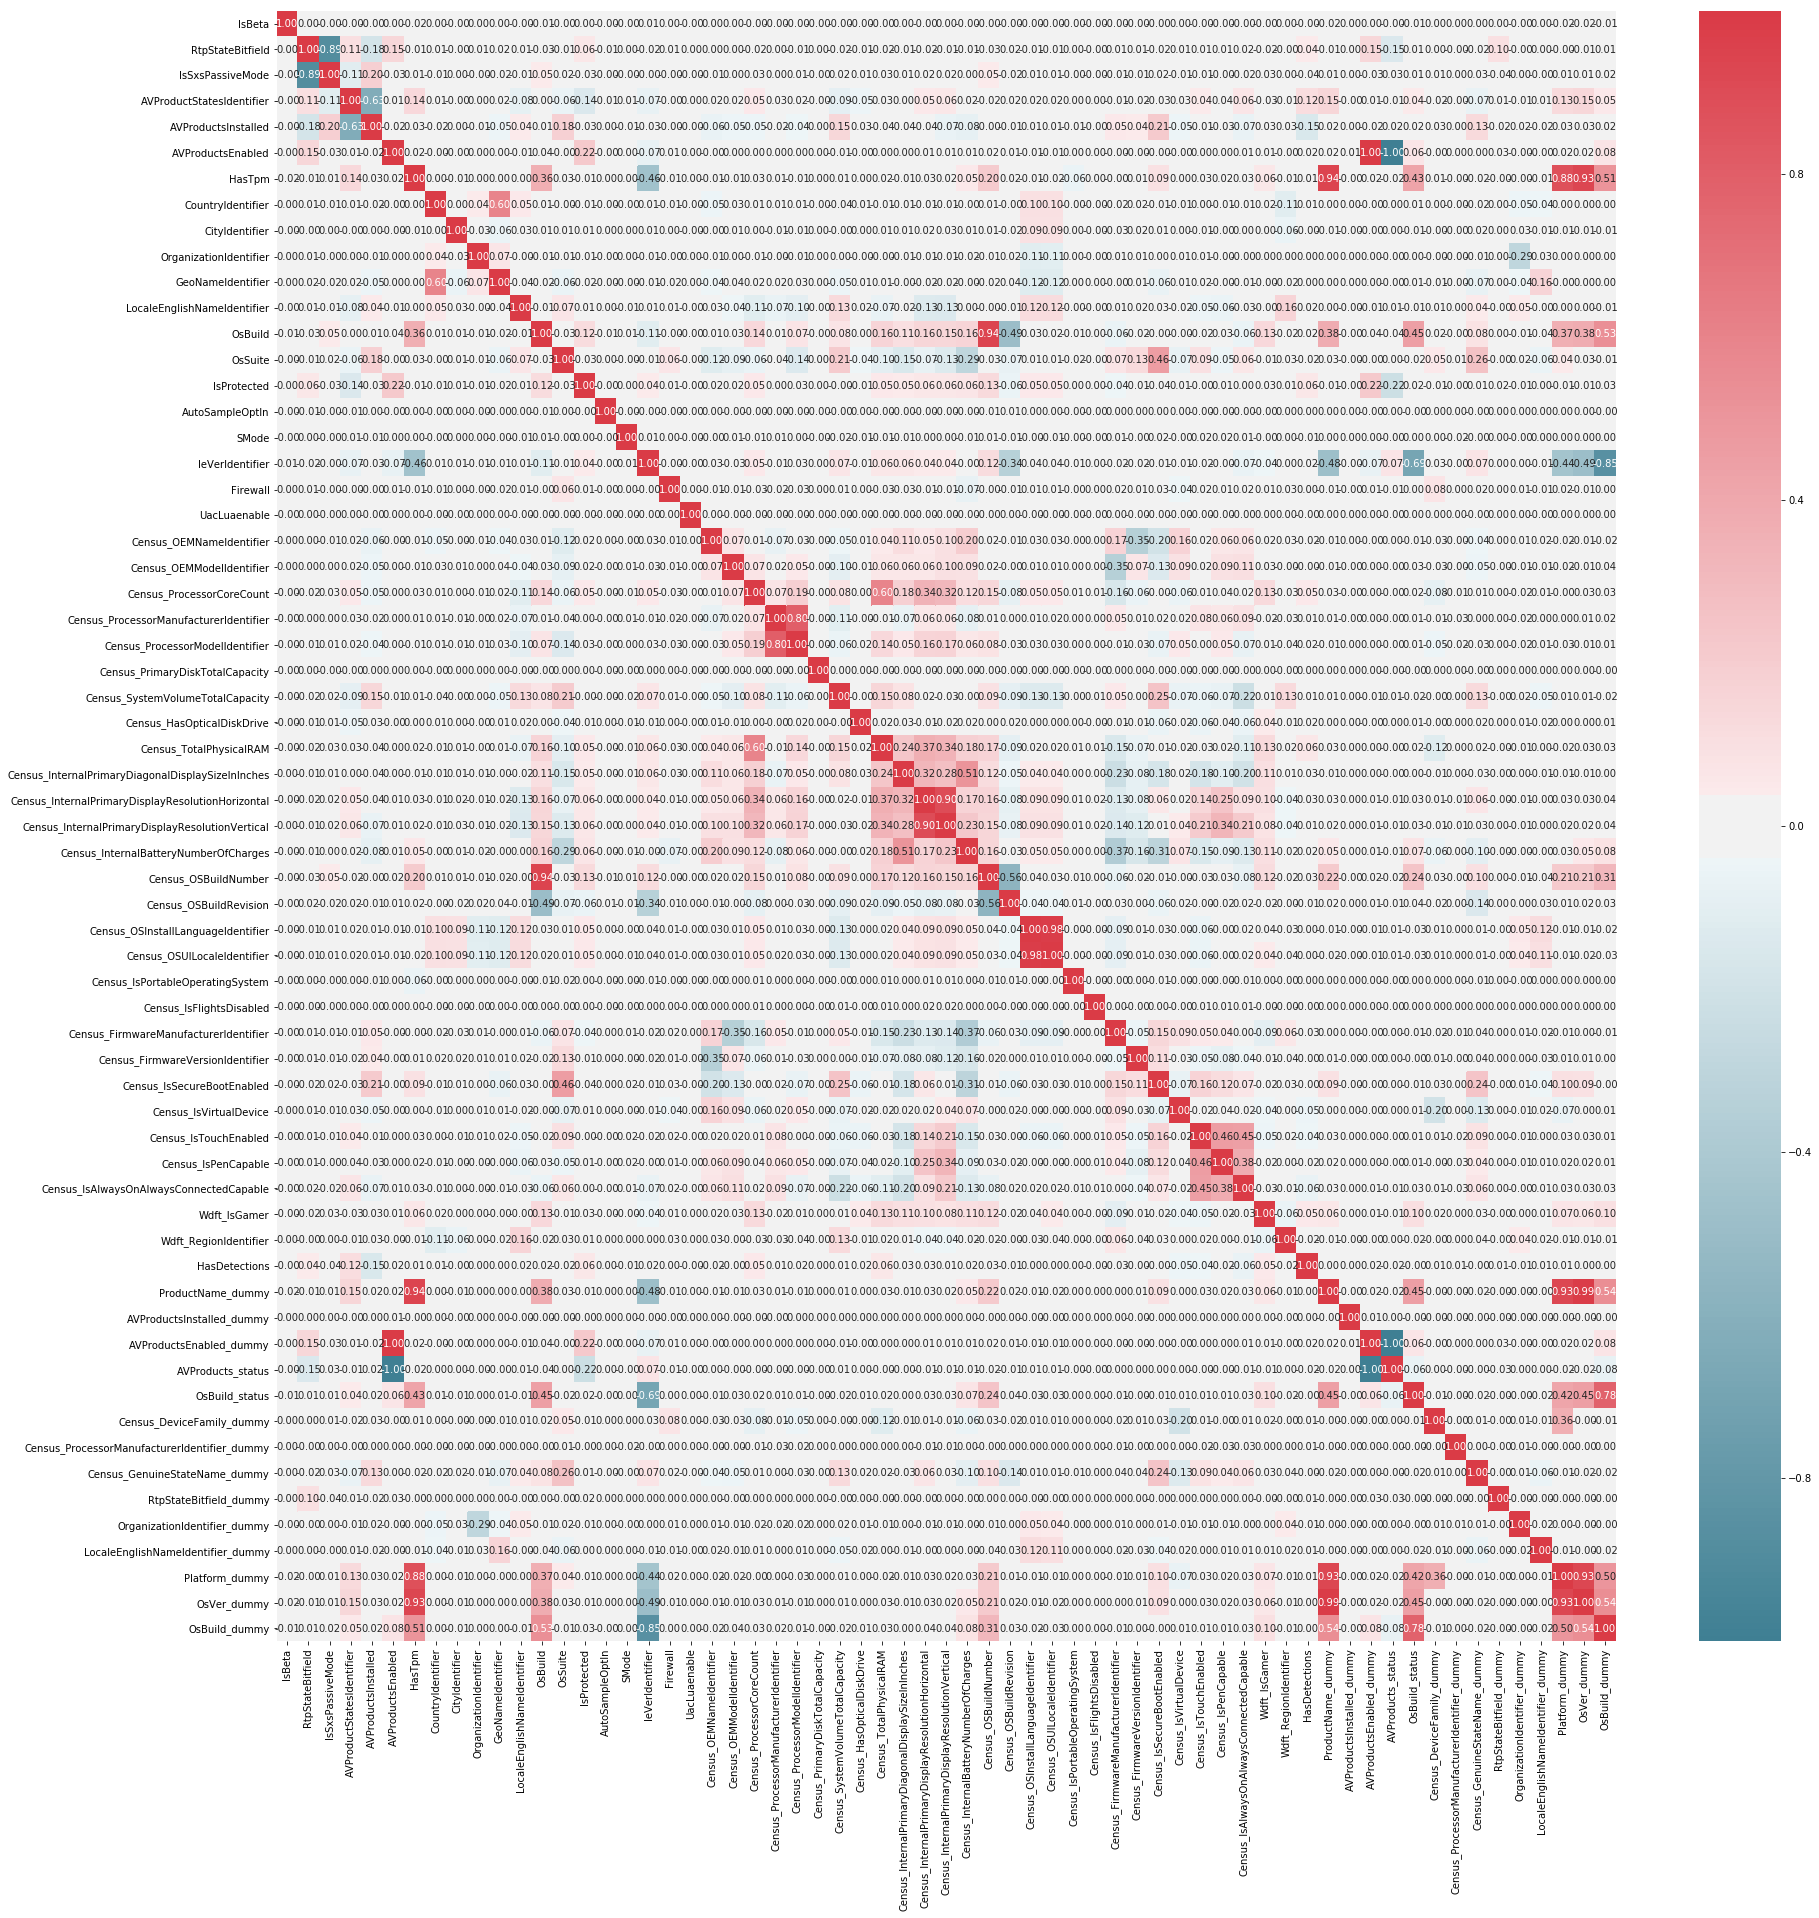

In [149]:
fig, ax = plt.subplots(figsize=(30,30))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1, cmap=colormap, annot=True, fmt=".2f")#

In [150]:
#fig.savefig("correlation.jpg")

In [151]:
#df.drop(columns=['IsSxsPassiveMode','AVProductStatesIdentifier','CountryIdentifier','Census_OSBuildNumber','Census_OSBuildRevision','Census_IsSecureBootEnabled','Census_ProcessorCoreCount','Census_ProcessorModelIdentifier','Census_InternalBatteryNumberOfCharges','Census_InternalPrimaryDisplayResolutionVertical','Census_OSUILocaleIdentifier','Census_IsPenCapable','Census_IsAlwaysOnAlwaysConnectedCapable'],inplace=True)

In [152]:
#correlated_cols=['IsSxsPassiveMode','AVProductStatesIdentifier','CountryIdentifier','Census_OSBuildNumber','Census_OSBuildRevision','Census_IsSecureBootEnabled','Census_ProcessorCoreCount','Census_ProcessorModelIdentifier','Census_InternalBatteryNumberOfCharges','Census_InternalPrimaryDisplayResolutionVertical','Census_OSUILocaleIdentifier','Census_IsPenCapable','Census_IsAlwaysOnAlwaysConnectedCapable']

In [153]:
categorical_cols=df.select_dtypes(include='category').columns.tolist()

In [154]:
categorical_cols=categorical_cols[1:]

In [155]:
len(categorical_cols)

23

In [157]:
f=[]
for col in categorical_cols:
    print("Number of Unique Value : "+str(col)+" :",df[col].nunique())
    if df[col].nunique()>100:
        f.append(col)        

Number of Unique Value : ProductName : 6
Number of Unique Value : EngineVersion : 70
Number of Unique Value : AppVersion : 110
Number of Unique Value : AvSigVersion : 8531
Number of Unique Value : Platform : 4
Number of Unique Value : Processor : 3
Number of Unique Value : OsVer : 58
Number of Unique Value : OsPlatformSubRelease : 9
Number of Unique Value : SkuEdition : 8
Number of Unique Value : SmartScreen : 21
Number of Unique Value : Census_MDC2FormFactor : 13
Number of Unique Value : Census_DeviceFamily : 3
Number of Unique Value : Census_PrimaryDiskTypeName : 4
Number of Unique Value : Census_ChassisTypeName : 52
Number of Unique Value : Census_PowerPlatformRoleName : 10
Number of Unique Value : Census_OSBranch : 32
Number of Unique Value : Census_OSEdition : 33
Number of Unique Value : Census_OSSkuName : 30
Number of Unique Value : Census_OSInstallTypeName : 9
Number of Unique Value : Census_OSWUAutoUpdateOptionsName : 6
Number of Unique Value : Census_GenuineStateName : 5
Numbe

In [158]:
df.shape

(8921483, 88)

In [159]:
f

['AppVersion', 'AvSigVersion']

In [160]:
#for col in categorical_cols:
#    if col in f:
#        continue
#    elif df[col].nunique()==2:
#        continue
#    else:
#        df=pd.get_dummies(data=df,columns=[col])

In [165]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_DeviceFamily_dummy,Census_ProcessorManufacturerIdentifier_dummy,Census_GenuineStateName_dummy,HasTpm_Firewall_dummy,RtpStateBitfield_dummy,OrganizationIdentifier_dummy,LocaleEnglishNameIdentifier_dummy,Platform_dummy,OsVer_dummy,OsBuild_dummy
0,0000028988387b115f69f31a3bf04f09,4,65,59,7800,0,7.0,0,53447.0,1.0,...,1,1,1,True,1,1,1,1,1,1
1,000007535c3f730efa9ea0b7ef1bd645,4,55,26,6303,0,7.0,0,53447.0,1.0,...,1,1,0,True,1,1,1,1,1,1
2,000007905a28d863f6d0d597892cd692,4,65,59,7671,0,7.0,0,53447.0,1.0,...,1,1,1,True,1,1,0,1,1,1
3,00000b11598a75ea8ba1beea8459149f,4,65,59,7722,0,7.0,0,53447.0,1.0,...,1,1,1,True,1,1,0,1,1,1
4,000014a5f00daa18e76b81417eeb99fc,4,65,59,7681,0,7.0,0,53447.0,1.0,...,1,1,1,True,1,1,1,1,1,1


In [162]:
df.shape

(8921483, 88)

In [163]:
from sklearn.preprocessing import LabelEncoder
le = {}
for col in categorical_cols:
    le[col] = LabelEncoder()
    df.loc[:,col] = le[col].fit_transform(df.loc[:,col])


In [167]:
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,auc,precision_score,recall_score,roc_auc_score

In [168]:
l=[]
for col in df.columns:
    if col=='HasDetections':
        continue
    else:
        l.append(col)
l=l+list(['HasDetections'])

In [169]:
df=df[l]

In [170]:
#df.to_csv("mydataframe.csv",index=False)

In [171]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_ProcessorManufacturerIdentifier_dummy,Census_GenuineStateName_dummy,HasTpm_Firewall_dummy,RtpStateBitfield_dummy,OrganizationIdentifier_dummy,LocaleEnglishNameIdentifier_dummy,Platform_dummy,OsVer_dummy,OsBuild_dummy,HasDetections
0,0000028988387b115f69f31a3bf04f09,4,65,59,7800,0,7.0,0,53447.0,1.0,...,1,1,True,1,1,1,1,1,1,0
1,000007535c3f730efa9ea0b7ef1bd645,4,55,26,6303,0,7.0,0,53447.0,1.0,...,1,0,True,1,1,1,1,1,1,0
2,000007905a28d863f6d0d597892cd692,4,65,59,7671,0,7.0,0,53447.0,1.0,...,1,1,True,1,1,0,1,1,1,0
3,00000b11598a75ea8ba1beea8459149f,4,65,59,7722,0,7.0,0,53447.0,1.0,...,1,1,True,1,1,0,1,1,1,1
4,000014a5f00daa18e76b81417eeb99fc,4,65,59,7681,0,7.0,0,53447.0,1.0,...,1,1,True,1,1,1,1,1,1,1


In [172]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [173]:
#df=""

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
#X['Interactions_ProductName_EngineVersion_AppVersion']=X['ProductName']*X['EngineVersion']*X['AppVersion']

In [176]:
#X['Interactions_AVProductsEnabled_AVProductsInstalled']=X['AVProductsEnabled']*X['AVProductsInstalled']

In [177]:
del df

In [178]:
import gc

In [179]:
gc.collect()

12

In [182]:
gc.collect()

0

In [183]:
#from sklearn.preprocessing import PolynomialFeatures

In [184]:
%%time
#p=PolynomialFeatures(degree=2,include_bias=False).fit(X)
#features = pd.DataFrame(data=p.transform(X), columns=p.get_feature_names(X.columns))

Wall time: 0 ns


In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [186]:
%%time
from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate=0.1,n_estimators=25,random_state=42,silent=False,max_depth=6)
xgb.fit(X_train,y_train)

[10:40:04] Tree method is automatically selected to be 'approx' for faster speed. to use old behavior(exact greedy algorithm on single machine), set tree_method to 'exact'
[10:40:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[10:41:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[10:42:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[10:42:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[10:43:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[10:44:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_p

In [187]:
#from sklearn.ensemble import GradientBoostingClassifier

In [188]:
%%time
#gb=GradientBoostingClassifier(learning_rate=0.1,max_depth=6,n_estimators=20,random_state=42,verbose=True)
#gb.fit(X_train,y_train)

Wall time: 0 ns


In [189]:
predictions=xgb.predict(X_test)
prediction_scores=xgb.predict_proba(X_test)
scores=[]
for score in prediction_scores:
    scores.append(score[1])


C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [190]:
print("Accuracy Score : ",accuracy_score(y_test,predictions))
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print("ROC AUC score : ",roc_auc_score(y_test,scores))
#print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))

Accuracy Score :  0.634918402037329
Precision :  0.6313223904396432
Recall :  0.6468129653649538
ROC AUC score :  0.6944927343752221


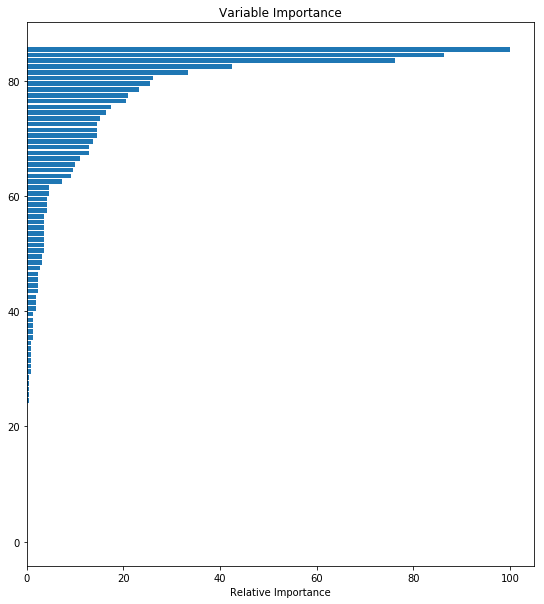

In [191]:
feature_importance=xgb.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx3 = np.argsort(feature_importance)

pos = np.arange(sorted_idx3.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx3], align='center')
#plt.yticks(pos, np.array(train_x.columns))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [192]:
len(X.columns[np.argsort(np.sort(feature_importance[feature_importance>0]))])

62

In [193]:
X.columns[np.argsort(np.sort(feature_importance[feature_importance>0]))]

Index(['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'IsBeta',
       'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'LocaleEnglishNameIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'CountryIdentifier', 'CityIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'SMode',
       'Census_DeviceFamily', 'Census_OEMNameIdentifier', 'UacLuaenable',
       'Census_MDC2FormFactor', 'SmartScreen', 'IeVerIdentifier', 'Firewall',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_Chassis

In [194]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(learning_rate=0.1,max_depth=6,n_estimators=25,random_state=42,verbose=True)
gb.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3667          122.34m
         2           1.3506          113.35m
         3           1.3373          108.55m
         4           1.3262          103.80m
         5           1.3170           98.38m
         6           1.3091           92.97m
         7           1.3024           87.38m
         8           1.2968           82.04m
         9           1.2917           95.68m
        10           1.2876           85.73m
        20           1.2645           25.50m
Wall time: 2h 7min 31s


In [195]:
predictions=gb.predict(X_test)
prediction_scores=gb.predict_proba(X_test)
scores=[]
for score in prediction_scores:
    scores.append(score[1])
print("Accuracy Score : ",accuracy_score(y_test,predictions))
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print("ROC AUC score : ",roc_auc_score(y_test,scores))
#print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))

Accuracy Score :  0.6346079156104617
Precision :  0.6294776692850664
Recall :  0.6526004335551975
ROC AUC score :  0.6946467906385155


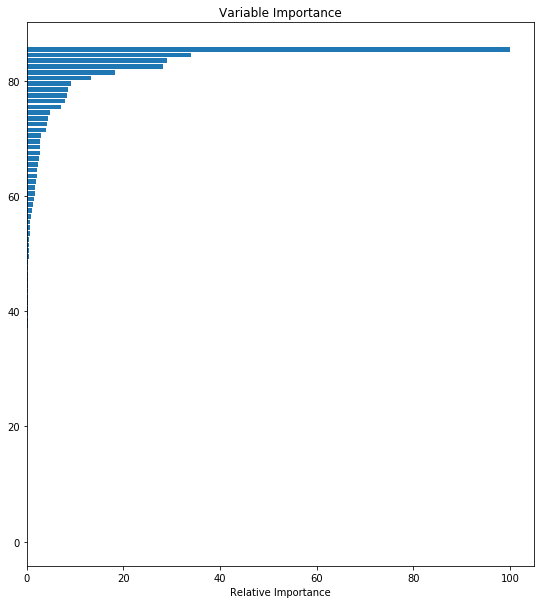

In [196]:
feature_importance2=gb.feature_importances_

feature_importance2 = 100.0 * (feature_importance2 / feature_importance2.max())

sorted_idx3 = np.argsort(feature_importance2)

pos = np.arange(sorted_idx3.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance2[sorted_idx3], align='center')
#plt.yticks(pos, np.array(train_x.columns))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [197]:
#X=X.iloc[:,20:]

In [198]:
#from sklearn.preprocessing import PolynomialFeatures

In [199]:
#p=PolynomialFeatures(degree=2,include_bias=False,interaction_only=True).fit(X)

In [200]:
#X=pd.DataFrame(data=p.transform(X),columns=p.get_feature_names(X.columns))

In [201]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [202]:
#xgb=XGBClassifier(learning_rate=0.1,n_estimators=100,random_state=42,silent=False)

In [269]:
%%time
df_test=pd.read_csv("test.csv",dtype={'MachineIdentifier': 'category',
 'ProductName': 'category',
 'EngineVersion': 'category',
 'AppVersion': 'category',
 'AvSigVersion': 'category',
 'Platform': 'category',
 'Processor': 'category',
 'OsVer': 'category',
 'OsPlatformSubRelease': 'category',
 'OsBuildLab': 'category',
 'SkuEdition': 'category',
 'PuaMode': 'category',
 'SmartScreen': 'category',
 'Census_MDC2FormFactor': 'category',
 'Census_DeviceFamily': 'category',
 'Census_ProcessorClass': 'category',
 'Census_PrimaryDiskTypeName': 'category',
 'Census_ChassisTypeName': 'category',
 'Census_PowerPlatformRoleName': 'category',
 'Census_InternalBatteryType': 'category',
 'Census_OSVersion': 'category',
 'Census_OSArchitecture': 'category',
 'Census_OSBranch': 'category',
 'Census_OSEdition': 'category',
 'Census_OSSkuName': 'category',
 'Census_OSInstallTypeName': 'category',
 'Census_OSWUAutoUpdateOptionsName': 'category',
 'Census_GenuineStateName': 'category',
 'Census_ActivationChannel': 'category',
 'Census_FlightRing': 'category',
 'RtpStateBitfield': 'float16',
 'DefaultBrowsersIdentifier': 'float16',
 'AVProductsInstalled': 'float16',
 'AVProductsEnabled': 'float16',
 'OrganizationIdentifier': 'float16',
 'GeoNameIdentifier': 'float16',
 'IsProtected': 'float16',
 'SMode': 'float16',
 'IeVerIdentifier': 'float16',
 'Firewall': 'float16',
 'Census_OEMNameIdentifier': 'float16',
 'Census_ProcessorCoreCount': 'float16',
 'Census_ProcessorManufacturerIdentifier': 'float16',
 'Census_ProcessorModelIdentifier': 'float16',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float16',
 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float16',
 'Census_InternalPrimaryDisplayResolutionVertical': 'float16',
 'Census_OSInstallLanguageIdentifier': 'float16',
 'Census_IsFlightingInternal': 'float16',
 'Census_IsFlightsDisabled': 'float16',
 'Census_ThresholdOptIn': 'float16',
 'Census_FirmwareManufacturerIdentifier': 'float16',
 'Census_IsWIMBootEnabled': 'float16',
 'Census_IsVirtualDevice': 'float16',
 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float16',
 'Wdft_IsGamer': 'float16',
 'Wdft_RegionIdentifier': 'float16',
 'AVProductStatesIdentifier': 'float32',
 'CityIdentifier': 'float32',
 'UacLuaenable': 'float32',
 'Census_OEMModelIdentifier': 'float32',
 'Census_PrimaryDiskTotalCapacity': 'float32',
 'Census_SystemVolumeTotalCapacity': 'float32',
 'Census_TotalPhysicalRAM': 'float32',
 'Census_InternalBatteryNumberOfCharges': 'float32',
 'Census_FirmwareVersionIdentifier': 'float32',
 'IsBeta': 'int32',
 'IsSxsPassiveMode': 'int32',
 'HasTpm': 'int32',
 'CountryIdentifier': 'int32',
 'LocaleEnglishNameIdentifier': 'int32',
 'OsBuild': 'int32',
 'OsSuite': 'int32',
 'AutoSampleOptIn': 'int32',
 'Census_HasOpticalDiskDrive': 'int32',
 'Census_OSBuildNumber': 'int32',
 'Census_OSBuildRevision': 'int32',
 'Census_OSUILocaleIdentifier': 'int32',
 'Census_IsPortableOperatingSystem': 'int32',
 'Census_IsSecureBootEnabled': 'int32',
 'Census_IsTouchEnabled': 'int32',
 'Census_IsPenCapable': 'int32'})

Wall time: 4min 31s


In [270]:
solution=pd.DataFrame()

In [271]:
solution['MachineIdentifier']=df_test['MachineIdentifier']

In [272]:
categorical_cols=df_test.select_dtypes(include='category').columns.tolist()

In [273]:
categorical_cols=categorical_cols[1:]

In [274]:
temp_list=df_test.columns[df_test.isnull().any()].tolist()

In [275]:
%%time
df_test['ProductName_dummy']=[1 if x=='win8defender' else 0 for x in df_test['ProductName']]
df_test['AVProductsInstalled_dummy']=[1 if x>0 else 0 for x in df_test['AVProductsInstalled']]
df_test['AVProductsEnabled_dummy']=[1 if x>0 else 0 for x in df_test['AVProductsEnabled']]
df_test['AVProducts_status']=df_test['AVProductsInstalled_dummy']-df_test['AVProductsEnabled_dummy']
df_test['OsBuild_status']=np.where((df_test.Census_OSBuildNumber==df_test.OsBuild),1,0)
df_test['Census_DeviceFamily_dummy']=[1 if x=='Windows.Desktop' else 0 for x in df_test['Census_DeviceFamily']]
df_test['Census_ProcessorManufacturerIdentifier_dummy']=[1 if x in [1.0,3.0,5.0] else 0 for x in df_test['Census_ProcessorManufacturerIdentifier']]
df_test['Census_GenuineStateName_dummy']=[1 if x=='IS_GENUINE' else 0 for x in df_test['Census_GenuineStateName']]
df_test['RtpStateBitfield_dummy']=[1 if x in [7.0,0.0,5.0,8.0] else 0 for x in df_test['RtpStateBitfield']]
df_test['OrganizationIdentifier_dummy']=[1 if x in [27.0,18.0,48.0] else 0 for x in df_test['OrganizationIdentifier']]
df_test['LocaleEnglishNameIdentifier_dummy']=[1 if x in [75,182,74,42,88,171,233,227,251,124,103,64,46,134,217,214,218,170] else 0 for x in df_test['LocaleEnglishNameIdentifier']]
df_test['Platform_dummy']=[1 if x in ['windows10','windows8'] else 0 for x in df_test['Platform']]
df_test['OsVer_dummy']=[1 if x in ['10.0.0.0','6.3.0.0'] else 0 for x in df_test['OsVer']]


df_test['OsBuild_dummy']=[1 if x in [17134,16299,15063,14393,10586,10240] else 0 for x in df_test['OsBuild']]
df_test['HasTpm_Firewall_dummy']=df_test.HasTpm&df_test.Firewall

Wall time: 60 s


In [276]:
X.shape

(8921483, 86)

In [277]:
df_test.shape

(7853253, 97)

In [278]:
df_test=df_test[X.columns]

In [279]:
df_test.shape

(7853253, 86)

In [280]:
df_test.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_DeviceFamily_dummy,Census_ProcessorManufacturerIdentifier_dummy,Census_GenuineStateName_dummy,HasTpm_Firewall_dummy,RtpStateBitfield_dummy,OrganizationIdentifier_dummy,LocaleEnglishNameIdentifier_dummy,Platform_dummy,OsVer_dummy,OsBuild_dummy
0,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,53447.0,1.0,1.0,...,1,1,1,True,1,1,1,1,1,1
1,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,53447.0,1.0,1.0,...,1,1,1,True,1,0,1,1,1,1
2,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,49480.0,2.0,1.0,...,1,1,1,True,1,0,1,1,1,1
3,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,42160.0,2.0,1.0,...,1,1,1,True,1,0,1,1,1,1
4,win8defender,1.1.15400.4,4.18.1809.2,1.279.236.0,0,7.0,0,53447.0,1.0,1.0,...,1,1,1,True,1,1,1,1,1,1


In [281]:
X.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_DeviceFamily_dummy,Census_ProcessorManufacturerIdentifier_dummy,Census_GenuineStateName_dummy,HasTpm_Firewall_dummy,RtpStateBitfield_dummy,OrganizationIdentifier_dummy,LocaleEnglishNameIdentifier_dummy,Platform_dummy,OsVer_dummy,OsBuild_dummy
0,4,65,59,7800,0,7.0,0,53447.0,1.0,1,...,1,1,1,True,1,1,1,1,1,1
1,4,55,26,6303,0,7.0,0,53447.0,1.0,1,...,1,1,0,True,1,1,1,1,1,1
2,4,65,59,7671,0,7.0,0,53447.0,1.0,1,...,1,1,1,True,1,1,0,1,1,1
3,4,65,59,7722,0,7.0,0,53447.0,1.0,1,...,1,1,1,True,1,1,0,1,1,1
4,4,65,59,7681,0,7.0,0,53447.0,1.0,1,...,1,1,1,True,1,1,1,1,1,1


In [285]:
df_test.columns[df_test.isnull().any()]

Index(['SmartScreen', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_InternalBatteryNumberOfCharges',
       'Census_OSEdition', 'Census_OSInstallLanguageIdentifier',
       'Census_GenuineStateName', 'Census_IsFlightsDisabled',
       'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier', 'Census_IsVirtualDevice',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer',
       'Wdft_RegionIdentifier'

In [289]:
%%time
for col in temp_list:
    if col in df_test.select_dtypes(include='category').columns:
        df_test[col].fillna(statistics.mode(X[col]),inplace=True)
    else:
        df_test[col].fillna(np.nanmedian(X[col]),inplace=True)

KeyError: 'DefaultBrowsersIdentifier'

array([13,  7,  9, 14, 11,  5, 15, 10, 16,  0,  1,  8, 12,  3, 19,  6, 17,
       20,  4, 18,  2], dtype=int64)

In [258]:
df_test.columns[df_test.isnull().any()]

Index(['DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier', 'OsBuildLab',
       'IsProtected', 'PuaMode', 'SMode', 'IeVerIdentifier', 'SmartScreen',
       'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_InternalBatteryType',
       'Census_InternalBatteryNumberOfCharges', 'Census_

In [241]:
df_test=df_test[X.columns]

In [243]:
%%time
for col in categorical_cols:
    #le[col] = LabelEncoder()
    try:
        df_test.loc[:,col] = le[col].fit_transform(df_test.loc[:,col])
    except:
        print(col)
        continue

OsBuildLab
PuaMode
SmartScreen
Census_ProcessorClass
Census_InternalBatteryType
Census_OSVersion
Census_OSArchitecture
Wall time: 5min 10s


In [ ]:
df_test.drop(columns=['PuaMode'],inplace=True)

0                   NaN
1          RequireAdmin
2          RequireAdmin
3          RequireAdmin
4          RequireAdmin
5                   NaN
6                   NaN
7                   NaN
8                   NaN
9          RequireAdmin
10                  Off
11         ExistsNotSet
12                  NaN
13                 Warn
14                  NaN
15                  NaN
16         RequireAdmin
17         RequireAdmin
18                  NaN
19                  NaN
20         RequireAdmin
21         ExistsNotSet
22                  NaN
23                  NaN
24         RequireAdmin
25                  NaN
26         RequireAdmin
27                  Off
28                  NaN
29                  NaN
               ...     
7853223    RequireAdmin
7853224    RequireAdmin
7853225             NaN
7853226             NaN
7853227    RequireAdmin
7853228    RequireAdmin
7853229             NaN
7853230    RequireAdmin
7853231             NaN
7853232             NaN
7853233    Requi

In [140]:
df_test=df_test[X.columns.tolist()]

In [141]:
df_test['ProductName']=[1 if x=='win8defender' else 0 for x in df_test['ProductName']]
df_test['EngineVersion']=[1 if x in ['1.1.15200.1','1.1.15100.1','1.1.15000.2','1.1.14901.4','1.1.14800.3'] else 0 for x in df_test['EngineVersion']]
df_test['RtpStateBitfield']=[1 if x in [7.0,0.0,5.0,8.0] else 0 for x in df_test['RtpStateBitfield']]
df_test['AVProductsInstalled']=[1 if x in [1.0,2.0,3.0] else 0 for x in df_test['AVProductsInstalled']]
df_test['AVProductsEnabled']=[1 if x in [1.0,2.0,3.0,4.0,5.0] else 0 for x in df_test['AVProductsEnabled']]
df_test['OrganizationIdentifier']=[1 if x in [27.0,18.0,48.0] else 0 for x in df_test['OrganizationIdentifier']]
df_test['LocaleEnglishNameIdentifier']=[1 if x in [75,182,74,42,88,171,233,227,251,124,103,64,46,134,217,214,218,170] else 0 for x in df_test['LocaleEnglishNameIdentifier']]
df_test['Platform']=[1 if x in ['windows10','windows8'] else 0 for x in df_test['Platform']]
df_test['OsVer']=[1 if x in ['10.0.0.0','6.3.0.0'] else 0 for x in df_test['OsVer']]
df_test['OsBuild']=[1 if x in [17134,16299,15063,14393,10586,10240] else 0 for x in df_test['OsBuild']]



In [142]:
df_test.shape

(7853253, 74)

In [143]:
#df_test.fillna?

In [144]:
import statistics

In [145]:
statistics.mode(le[categorical_cols[0]].inverse_transform(df.loc[:,categorical_cols[0]]))

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'4.18.1807.18075'

In [146]:
categorical_cols

['AppVersion',
 'AvSigVersion',
 'Processor',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [147]:
%%time
for col in df_test.columns[df_test.isnull().any()]:
    if col in categorical_cols:
        df_test[col].fillna(statistics.mode(le[col].inverse_transform(X.loc[:,col])),inplace=True)
        #print("Mode for column : "+str(col),statistics.mode(le[col].inverse_transform(X.loc[:,col])))
    else:
        df_test[col].fillna(statistics.mode(X[col]),inplace=True)
        #print("Mode for column : "+str(col),statistics.mode(X[col]))

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

Wall time: 1min 19s


In [148]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

In [149]:
%%time
for col in categorical_cols:
    df_test[col]=le[col].fit_transform(df_test[col])

Wall time: 3min 55s


In [150]:
#df_test=pd.get_dummies(data=df_test,columns=['Wdft_RegionIdentifier','OsPlatformSubRelease','UacLuaenable'])

In [151]:
#xgboost_important_columns=dummy_x.columns[np.argsort(np.sort(feature_importance[feature_importance>0]))].tolist()

In [152]:
df_test.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,1,0,70,9261,0,1,0,53447.0,1,1,...,7,807.0,8554.0,1,0.0,0,0,0.0,0.0,7.0
1,1,0,64,9005,0,1,0,53447.0,1,1,...,7,554.0,33105.0,1,0.0,0,0,0.0,1.0,12.0
2,1,0,64,8501,0,1,0,49480.0,1,1,...,7,556.0,63396.0,1,0.0,0,0,0.0,1.0,11.0
3,1,0,70,9301,0,1,0,42160.0,1,1,...,7,628.0,26320.0,1,0.0,0,0,0.0,0.0,10.0
4,1,0,64,8989,0,1,0,53447.0,1,1,...,7,556.0,63269.0,1,0.0,0,0,0.0,1.0,3.0


In [153]:
solution['HasDetections']=0

In [154]:
%%time
solution['HasDetections']=gb.predict_proba(df_test)

Wall time: 23 s


In [155]:
#df_test[dummy_X_train.columns]

In [156]:
%%time
solution.to_csv("EDA_v9_solution_2.csv",index=False)

Wall time: 55.8 s


In [157]:
solution.head()

,MachineIdentifier,HasDetections
0,0000010489e3af074adeac69c53e555e,0.478937
1,00000176ac758d54827acd545b6315a5,0.404791
2,0000019dcefc128c2d4387c1273dae1d,0.545009
3,0000055553dc51b1295785415f1a224d,0.652912
4,00000574cefffeca83ec8adf9285b2bf,0.468700


In [158]:
len(solution)

7853253

In [159]:
import gc

In [160]:
gc.collect()

182

In [162]:
df.memory_usage().sum()

3293512962

In [163]:
del df

In [164]:
gc.collect()

7